In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [58]:
df = pd.read_csv('diabetes.csv')

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


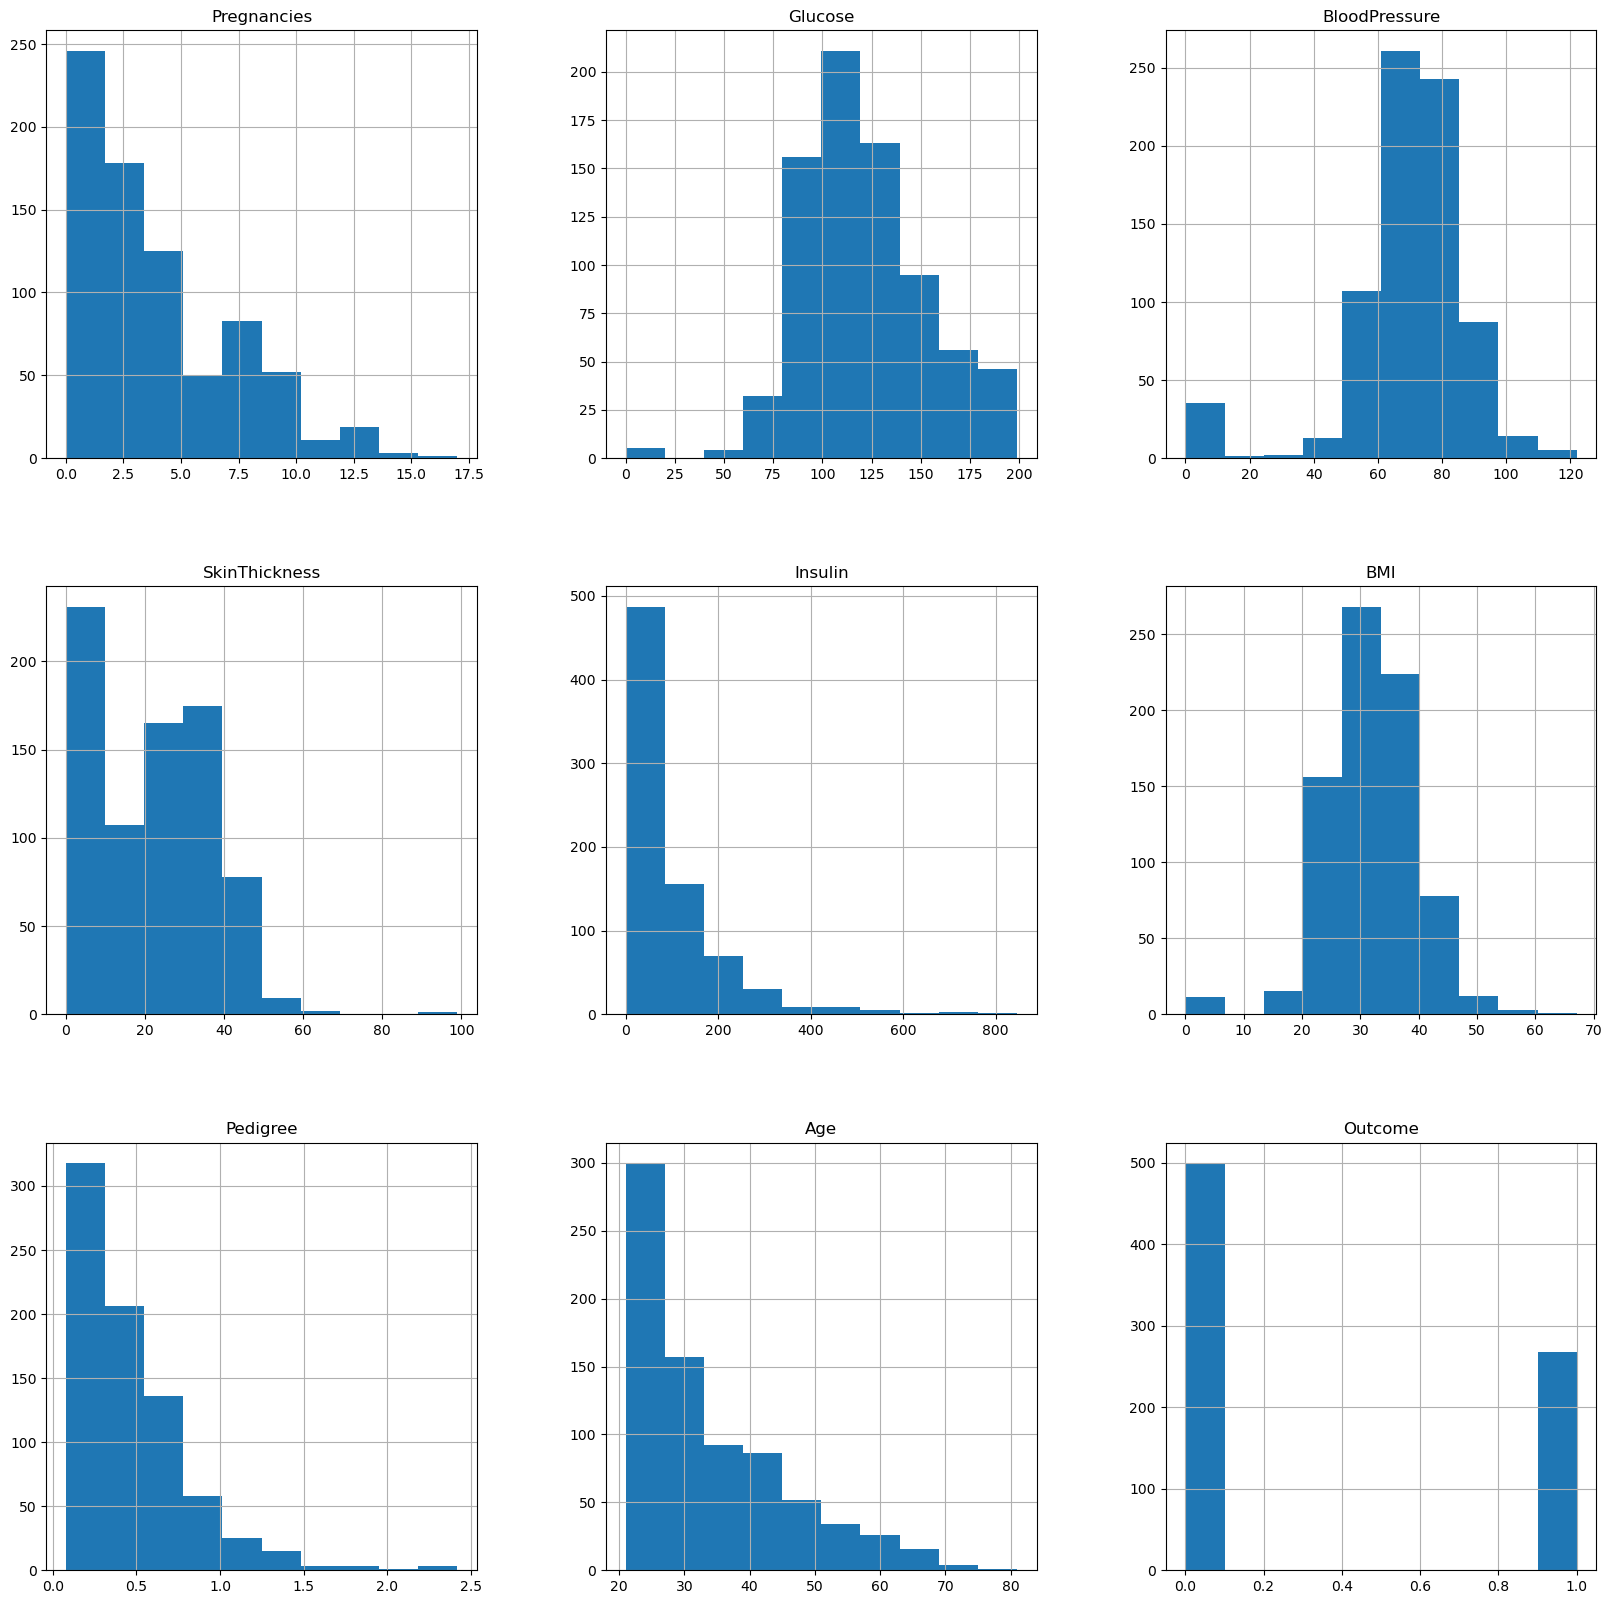

In [77]:
p = df.hist(figsize = (20,20))

In [60]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
parameters_grid = {"n_neighbors": np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_GSV = GridSearchCV(knn, param_grid=parameters_grid, cv=5)
knn_GSV.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [64]:
best_neighbors = knn_GSV.best_params_['n_neighbors']

In [65]:
final_knn_model = KNeighborsClassifier(n_neighbors=best_neighbors)
final_knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [66]:
y_pred = final_knn_model.predict(X_test_scaled)

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'''Confusion matrix :\n
    | Positive Prediction\t| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP): {conf_matrix[0, 0]}\t| False Negative (FN): {conf_matrix[0, 1]}
    ---------------+------------------------+----------------------
    Negative Class | False Positive (FP): {conf_matrix[1, 0]}\t| True Negative (TN): {conf_matrix[1, 1]}\n''')


Confusion matrix :

    | Positive Prediction	| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP): 78	| False Negative (FN): 21
    ---------------+------------------------+----------------------
    Negative Class | False Positive (FP): 24	| True Negative (TN): 31



In [68]:
accuracy = accuracy_score(y_test, y_pred)

In [69]:
error_rate = 1 - accuracy

In [70]:
precision = precision_score(y_test, y_pred)

In [71]:
recall = recall_score(y_test, y_pred)

In [72]:
print("\nAccuracy: {:.2f}%".format(accuracy * 100))
print("Error Rate: {:.2f}%".format(error_rate * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


Accuracy: 70.78%
Error Rate: 29.22%
Precision: 0.60
Recall: 0.56


In [73]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[78, 21],
       [24, 31]], dtype=int64)

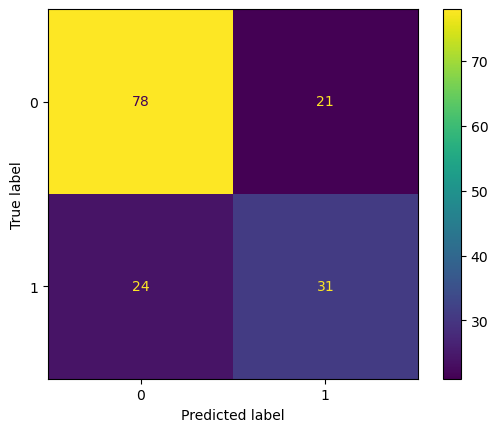

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154

